<a href="https://colab.research.google.com/github/mannanoyed/Web-Element-object-detection/blob/main/Banao_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Banao-Task 2
## Objective : detect the difference between two images and draw bounding boxes around the detected differences.


`by Mann Vishnoi`

Approach : We need to compare two similar images with little bit of differences, we can utilise opencv to do so
- import opencv, imutils
- first input both images
- turn images into gray scale for comparision
- use cv2 method absdiff, threshold and dialte methods to identify all the methods
- use imutils grab_contour method to draw rectangle


In [1]:
import cv2
import imutils
from cv2 import imshow
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
img1 = cv2.imread('input1.png')
img2 = cv2.imread('input2.png')

In [3]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

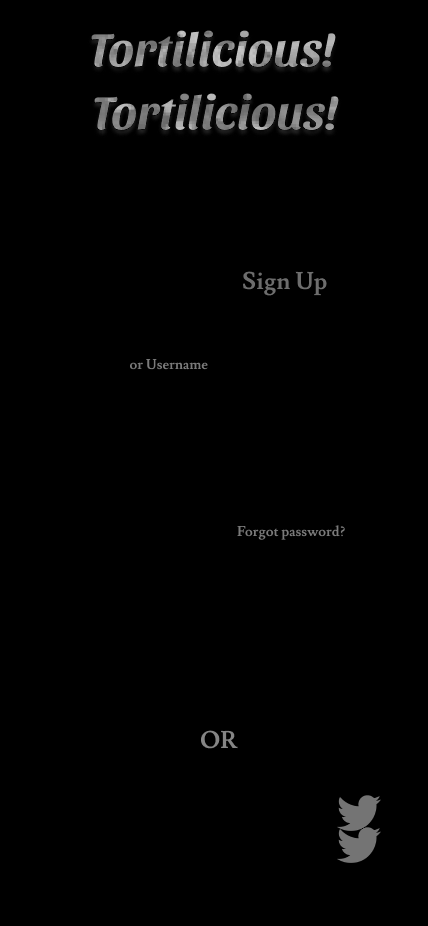

In [4]:
diff = cv2.absdiff(gray1, gray2)
cv2_imshow( diff)

Threshold to partition both images difference

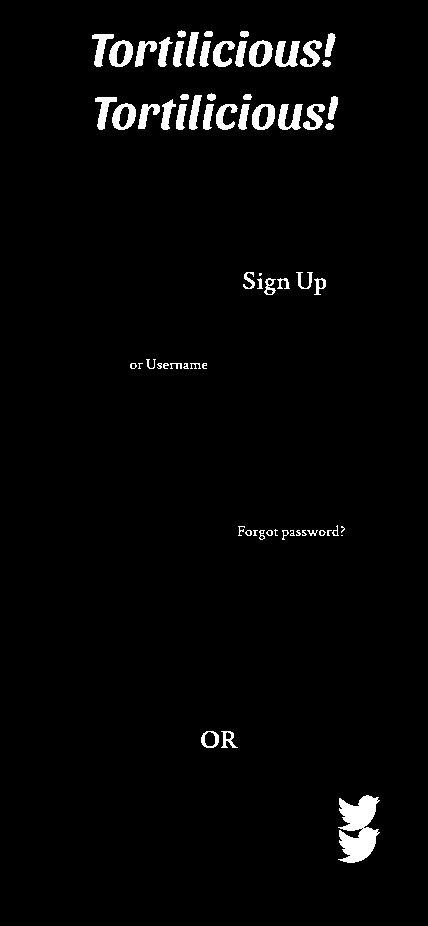

In [5]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

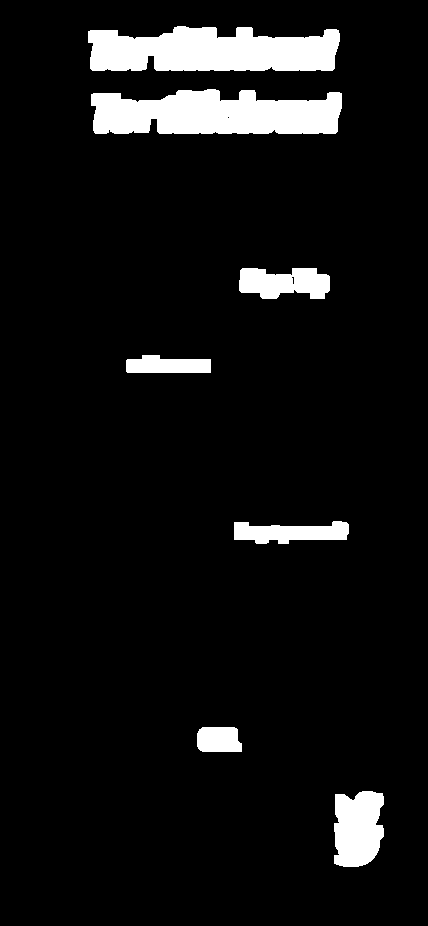

In [6]:
kernel = np.ones((5,5), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=2)
cv2_imshow(dilate)

In [7]:
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)


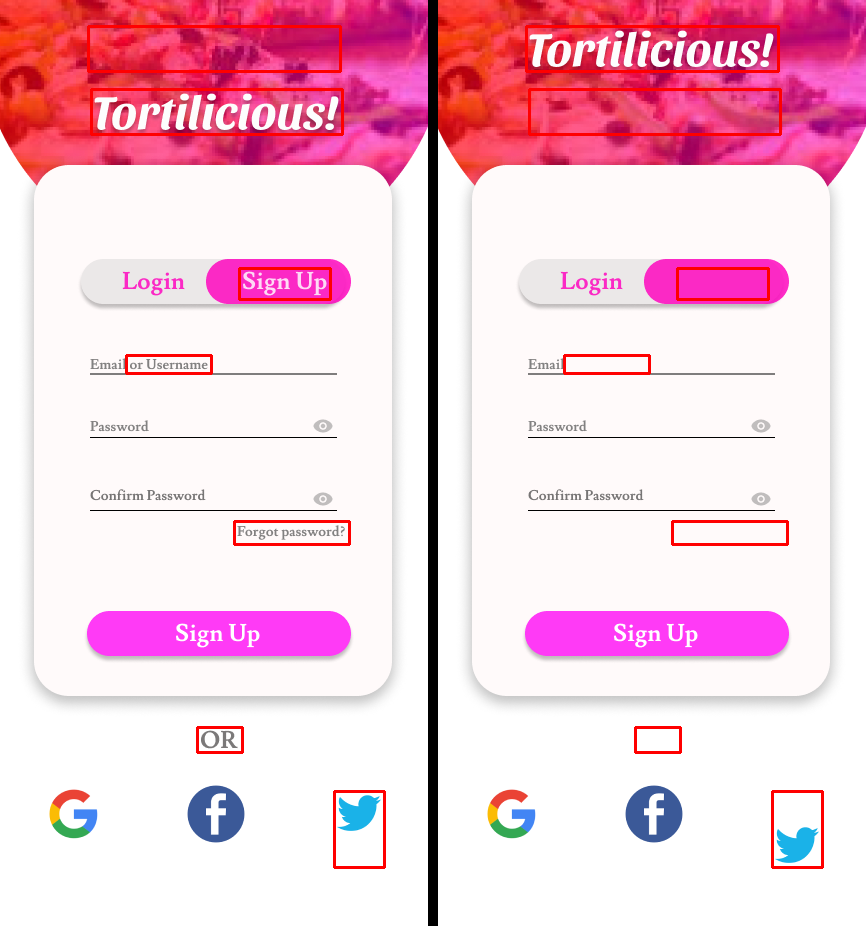

In [8]:
for contour in contours:
    if cv2.contourArea(contour) > 100:

        # Drawing rectangle
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img1, (x, y), (x+w, y+h), (0,0,255), 2)
        cv2.rectangle(img2, (x, y), (x+w, y+h), (0,0,255), 2)

img_height = img1.shape[0]


x = np.zeros((img_height,10,3), np.uint8)
result = np.hstack((img1, x, img2))
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Evaluation
- MSE : mean square error
- ssim

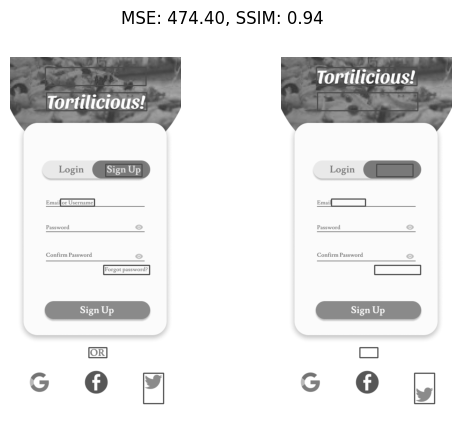

In [9]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
    error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    error /= float(imageA.shape[0] * imageA.shape[1])
    return error

def compare(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.show()


original = img1
new= img2
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
new= cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
images = ("Original", original), ("New", new)
compare(original, new, "Evaluation")

References :
- [open
 cv](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
- [github](https://github.com/kostasthanos/Spot-The-Differences)
